In [1]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [2]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [3]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [5]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

print("Y:" ,y)
X


Y: [1 0 1 ... 1 1 0]


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88                  0                0   
1                  1        112542.58                  0                1   
2                  0        113931.57                  0                0   
3                  0         93826.63                  0                0   
4                  1         79084.10                  0                1   
...              ...              ...                ...              ...   
9995               0         96270.64                  0                0   
9996               1        101699.77                  0                0   
9997               1         42085.58                  0                0   
9998               0         92888.52                  1                0   
9999               0         38190.78                  0                0   

      Gender_Male  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            0  
9998            1  
9999            0  

[10000 rows x 11 columns]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7389          667   34       5       0.00              2          1   
9275          427   42       1   75681.52              1          1   
2995          535   29       2  112367.34              1          1   
5316          654   40       5  105683.63              1          1   
356           850   57       8  126776.30              2          1   
...           ...  ...     ...        ...            ...        ...   
9225          594   32       4  120074.97              2          1   
4859          794   22       4  114440.24              1          1   
3264          738   35       5  161274.05              2          1   
9845          590   38       9       0.00              2          1   
2732          623   48       1  108076.33              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7389               0        163830.64                  0                1   
9275               1         57098.00                  1                0   
2995               0        185630.76                  0                0   
5316               0        173617.09                  0                1   
356                1        132298.49                  0                1   
...              ...              ...                ...              ...   
9225               1        162961.79                  1                0   
4859               1        107753.07                  0                1   
3264               0        181429.87                  0                0   
9845               1        148750.16                  0                1   
2732               0        118855.26                  1                0   

      Gender_Male  
7389            0  
9275            1  
2995            0  
5316            1  
356             0  
...           ...  
9225            0  
4859            0  
3264            1  
9845            0  
2732            0  

[8000 rows x 11 columns]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)


In [8]:
print(X_train_trf)
print(X_test_trf)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history =model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5737 - accuracy: 0.7697 - val_loss: 0.5168 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7958 - val_loss: 0.5053 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7958 - val_loss: 0.5017 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7958 - val_loss: 0.4994 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7958 - val_loss: 0.4981 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7958 - val_loss: 0.4971 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7958 - val_loss: 0.4965 - val_accuracy: 0.7969

In [11]:
y_pred = model.predict(X_test)
y_pred

array([[0.24513775],
       [0.24513775],
       [0.24513775],
       ...,
       [0.24513775],
       [0.23923388],
       [0.24513775]], dtype=float32)

In [12]:
y_pred = y_pred.argmax(axis=-1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

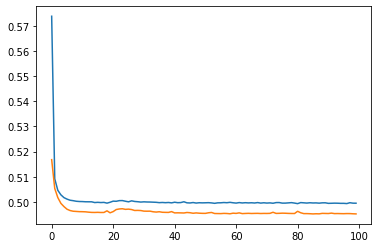

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

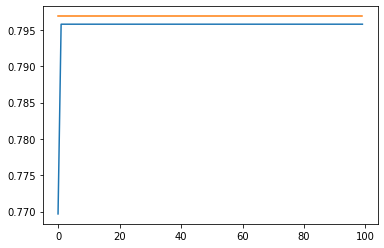

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])